In [17]:
import pandas as pd

In [18]:
titanic_df = pd.read_csv('../Datasets/titanic_processed.csv')

titanic_df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,1,24.0,2,0,73.5000,False,False,True
1,1,2,0,30.0,0,0,13.0000,False,False,True
2,1,1,0,36.0,0,2,71.0000,False,False,True
3,0,1,1,49.0,1,1,110.8833,True,False,False
4,0,3,1,44.0,0,0,8.0500,False,False,True


In [19]:
titanic_df.shape

(712, 10)

In [20]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
x_train.shape, y_train.shape

((569, 9), (569,))

In [22]:
x_test.shape, y_test.shape

((143, 9), (143,))

### Logistic regression for classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [23]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [24]:
y_pred = logistic_model.predict(x_test)

In [25]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [26]:
pred_results.head()

,y_test,y_pred
469,0,0
641,0,0
521,1,0
298,0,0
707,0,0


In [27]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)


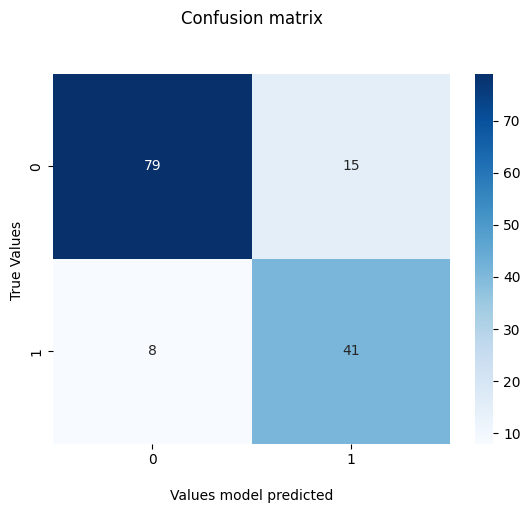

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


fx = sns.heatmap(titanic_crosstab, annot=True, cmap="Blues", fmt="d")
fx.set_title("Confusion matrix\n\n");
fx.set_xlabel("\nValues model predicted")
fx.set_ylabel("True Values ")
plt.show()


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [29]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.8391608391608392
precision_score :  0.8367346938775511
recall_score :  0.7321428571428571


In [31]:
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

In [32]:
accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

accuracy_score_verified

0.8391608391608392

In [33]:
precision_score_survived = TP / (TP + FP)

precision_score_survived

0.8367346938775511

In [34]:
recall_score_survived = TP / (TP + FN)

recall_score_survived

0.7321428571428571